<h1><center>Comments: Food vs. Exercise Modeling</center></h1>

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [11]:
df_body = pd.read_csv('../datasets/body_clean_comments.csv')


In [12]:
df_body.drop(columns=['Unnamed: 0'], inplace=True)
#I had to re-drop the 'Unnamed: 0' again. I tried to put an 
#'inplace=True' in the cleaning notebook but it did not work
#it keeps coming back

In [13]:
df_body.head(2)

,body,subreddit,body_clean
0,They look delicious but where are the dinosaur...,1,look delicious dinosaur shape
1,It looks like a pair of lungs,1,look like pair lung


In [14]:
df_com = pd.read_csv('../datasets/clean-food_and_exer-comments.csv')


In [15]:
df_com.drop(columns=['Unnamed: 0'], inplace=True)
#I had to re-drop the 'Unnamed: 0' again. I tried to put an 
#'inplace=True' in the cleaning notebook but it did not work
#it keeps coming back

In [16]:
df_body.dtypes

body          object
subreddit      int64
body_clean    object
dtype: object

# Modeling process

In [42]:
# created our X and y
X = df_body['body']
y = df_body['subreddit']

In [18]:
#checking the sample size to make sure they are fairly 
#balanced
#This data split is good
y.value_counts(normalize = True)

0    0.513798
1    0.486202
Name: subreddit, dtype: float64

In [43]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)
#stratify = y so the random sample is not over or under 


## Baseline Accuracy CountVectorizer & Logistic Regression

In [118]:
y_test.value_counts(normalize=True)

0    0.513731
1    0.486269
Name: subreddit, dtype: float64

In [147]:
#Instantiated Count Vectorizer
cvec = CountVectorizer()

In [178]:
# Instantiate Logistic Regression
lr = LogisticRegression()

In [149]:
# pipe = Pipeline([
#     ('cvec', CountVectorizer()),
#     ('lr', LogisticRegression(solver = 'lbfgs'))
# ])

In [20]:
#Baseline accuracy score
pipe = make_pipeline(CountVectorizer(), 
                     LogisticRegression(max_iter=100),
                    )
pipe.fit(X_train, y_train)
print('Baseline Train', pipe.score(X_train, y_train))
print('Baseline Test', pipe.score(X_test, y_test))
#Code adapted from global lecture

/Users/EderlynT/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Baseline Train 0.9443666899930021
Baseline Test 0.8873535070841351


## Baseline Accuracy Multinomial NB/ CountVectorizer

In [50]:
#Instantiate cvec
#baseline cvec
cvec = CountVectorizer()

In [51]:
#Code adapted from local lecture
# baseline cvec
X_train_processed = cvec.fit_transform(X_train)
X_test_processed = cvec.transform(X_test)

In [52]:
#Instantiate Multinomial NB
nb = MultinomialNB()

In [56]:
#Fit & scored NB
nb.fit(X_train_processed, y_train)
nb.score(X_test_processed, y_test)

0.8761588245583348

In [54]:
#re-instantiated cvec and included stop words
cvec = CountVectorizer(stop_words='english')
X_train_processed = cvec.fit_transform(X_train)
X_test_processed = cvec.transform(X_test)

In [55]:
#fit & scored NB
nb.fit(X_train_processed, y_train)
nb.score(X_test_processed, y_test)

0.8761588245583348

## Model 1: Multinomial NB/ CountVectorizer

In [21]:
#Created pipline 
pipe = make_pipeline(CountVectorizer(), MultinomialNB())

In [162]:
#model 1 parameters
params = dict(
    countvectorizer__ngram_range=[(1, 1), (1, 2), (1, 3)],
    countvectorizer__max_features = [100, 500, 1000],
    countvectorizer__stop_words = ['english', None],
    multinomialnb__alpha=[.5, 1, 5]
)

In [163]:
#model 1 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [166]:
#cv only asked for a 2-fold
#this model has 3
#n_jobs=-1 sped up the iteration process

gs = GridSearchCV(estimator=pipe, 
                  param_grid=params, 
                  n_jobs=-1, 
                  cv=3)


In [167]:
#fit model
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('countvectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                 

In [168]:
#Scored the test set
gs.score(X_test, y_test)

0.8389015217771558

In [169]:
#best score
gs.best_score_

0.8202705854910194

In [170]:
#best params used from the ones given 
gs.best_params_

{'countvectorizer__max_features': 1000,
 'countvectorizer__ngram_range': (1, 1),
 'countvectorizer__stop_words': None,
 'multinomialnb__alpha': 0.5}

## Model 2: Logistic Regression/ TFIDF Vectorizer

In [ ]:
# created our X and y
X = df_body['body']
y = df_body['subreddit']

In [28]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)
#stratify = y so the random sample is not over or under 


In [29]:
#Instantiated the TF-IDF Vec 
tvec = TfidfVectorizer()

In [30]:
# df = pd.DataFrame(tvec.fit_transform(X_train).toarray(),
#                   columns=tvec.get_feature_names())
# df.head()

In [33]:
#fit & transofrm the test & train
X_train_tvc = tvec.fit_transform(X_train)

X_test_tvc = tvec.transform(X_test)

In [35]:
# Instantiate logistic regression.
lr = LogisticRegression(solver = 'lbfgs')

In [34]:
# Fit logistic regression.
lr.fit(X_train_tvc, y_train)

# Evaluate logistic regression.
print(f'Training Score: {lr.score(X_train_tvc, y_train)}')
print(f'Testing Score: {lr.score(X_test_tvc, y_test)}')

Training Score: 0.9199323536272451
Testing Score: 0.8856043379394788


## Graph of Most Common Words

In [60]:
# Assistance from Cynthia 
# function from: https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d
def most_common_words(text):
    # Instantiate and fit CountVectorizer
    cvec = CountVectorizer()
    word_matrix = cvec.fit_transform(text)
    # Total number of times word appears in corpus
    word_counts = word_matrix.sum(axis=0)
    counts = [(word, word_counts[0, idx]) for word, idx in cvec.vocabulary_.items()]
    counts = sorted(counts, key = lambda x: x[1], reverse=True)
    return counts

In [61]:
common_words = most_common_words(df_body['body'])
#calling for common words in the body

In [62]:
common_words

[('the', 20115),
 ('to', 17795),
 ('you', 17674),
 ('and', 16614),
 ('it', 13345),
 ('of', 9482),
 ('that', 8021),
 ('is', 7704),
 ('for', 7620),
 ('in', 6985),
 ('your', 6539),
 ('on', 4911),
 ('but', 4802),
 ('my', 4711),
 ('with', 4569),
 ('this', 4474),
 ('do', 4257),
 ('if', 4142),
 ('have', 4116),
 ('can', 4058),
 ('be', 3795),
 ('so', 3664),
 ('just', 3459),
 ('are', 3453),
 ('or', 3428),
 ('like', 3364),
 ('as', 3347),
 ('not', 3316),
 ('at', 2842),
 ('good', 2734),
 ('more', 2632),
 ('what', 2621),
 ('get', 2522),
 ('up', 2498),
 ('out', 2456),
 ('me', 2351),
 ('was', 2230),
 ('some', 2214),
 ('will', 2214),
 ('re', 2115),
 ('don', 2058),
 ('from', 1875),
 ('all', 1862),
 ('would', 1840),
 ('about', 1811),
 ('how', 1775),
 ('they', 1760),
 ('time', 1748),
 ('there', 1737),
 ('when', 1710),
 ('body', 1700),
 ('weight', 1674),
 ('looks', 1643),
 ('one', 1640),
 ('then', 1617),
 ('exercise', 1532),
 ('make', 1525),
 ('also', 1491),
 ('day', 1475),
 ('really', 1439),
 ('go', 1432)

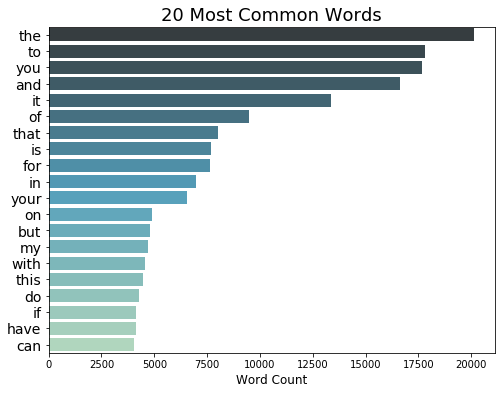

In [64]:
#Function for graph adapted from Cynthia 
common_words = most_common_words(df_body['body'])
plt.figure(figsize=(8, 6))
sns.barplot(x = [common_words[i][1] for i in range(20)],
            y = [common_words[i][0] for i in range(20)],
            palette = "GnBu_d")
plt.title('20 Most Common Words', fontsize=18)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(fontsize=14);